
# <font color = "FF7DOO"> Introduction </font>
<img src = "logov2.png">

Real estate is a burgeoning sector in Kenya, and many of us have come across it or engaged with it while searching for a house or room at some point.

This is what motivated the collection of data from an online rental website. 

This dataset includes variables such as location, monthly rent, and the number of bedrooms, making it a valuable illustrative example.

> <font color = "#15616D">Buy land, they're not making it anymore." - Mark Twain</font>

<img src = "https://www.worldbank.org/content/dam/photos/780x439/2017/apr-1/ke-kenya-needs-2-million-more-low-income-homes-building-them-would-boost-its-economic-growth-homepage-780x439.jpg">

In [2]:
# Data Manipulation and Analysis
import pandas as pd       
import numpy as np  
import os #directory
import re

# Data Visualization
import matplotlib.pyplot as plt   
import seaborn as sns             

# Machine Learning and Modeling
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression     # For linear regression modeling
from sklearn.metrics import mean_squared_error        # For model evaluation


# Statistical Analysis 
import scipy.stats as stats  # For statistical analysis

# Data Preprocessing and Feature Engineering
from sklearn.preprocessing import StandardScaler   # For standardizing features
from sklearn.preprocessing import LabelEncoder     # For encoding categorical variables

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# os.listdir()
df = pd.read_excel('RentData.xlsx')
df.head()


,Property,Location,Price
0,Furnished 60 m² Commercial Property with Fibre...,Westlands Area,"\nKSh 88,389\n"
1,4 Bed Townhouse with En Suite in Spring Valley,Spring Valley,"\nKSh 250,000\n"
2,4 Bed Apartment with En Suite in General Mathenge,General Mathenge,"\nKSh 150,000\n"
3,4 Bed House with En Suite at Rosslyn Lone Tree,Lone Tree,"\nKSh 280,000\n"
4,5 Bed House with En Suite in Rosslyn,in Rosslyn,"\nKSh 500,000\n"


# <font color = "FF7DOO"> Data cleaning </font>

<style>
  /* Define custom styles for text and subheadings */
  .text-color {
    color: #FFECD1;
  }

  .subheading-color {
    color: #BC5308;
  }

  }
</style>

## <span class="subheading-color">Objectives of Data Cleaning</span>

1. <span class="text-color">**Handling Missing Data:**</span> Identify and address missing values in the dataset, ensuring data integrity.

2. <span class="text-color">**Handling Duplicates:**</span> Detect and remove duplicate records to prevent bias in analysis.

3. <span class="text-color">**Outlier Detection and Treatment:**</span> Identify and address outliers that may affect statistical analyses.

4. <span class="text-color">**Data Type Conversion:**</span> Ensure appropriate data types for analysis, e.g., converting strings to numbers.

5. <span class="text-color">**Data Transformation:**</span> Perform necessary transformations like normalization or scaling for modeling.

6. <span class="text-color">**Consistency Checks:**</span> Ensure data consistency by resolving discrepancies and errors.

7. <span class="text-color">**Handling Categorical Data:**</span> Encode categorical variables for machine learning.





In [3]:
#cleaning Property Names
def cleaner1(description):
    phrases_to_exclude = ["at", "to", "in"]
    # Split the description using phrases and keep only the first part
    
    for phrase in phrases_to_exclude:
        description = description.split(phrase, 1)[0]
        
    return description
df['Property_New'] = df['Property'].apply(cleaner1)
df.head(10)    

,Property,Location,Price,Property_New
0,Furnished 60 m² Commercial Property with Fibre...,Westlands Area,"\nKSh 88,389\n",Furnished 60 m² Commercial Property with Fibre...
1,4 Bed Townhouse with En Suite in Spring Valley,Spring Valley,"\nKSh 250,000\n",4 Bed Townhouse with En Suite
2,4 Bed Apartment with En Suite in General Mathenge,General Mathenge,"\nKSh 150,000\n",4 Bed Apartment with En Suite
3,4 Bed House with En Suite at Rosslyn Lone Tree,Lone Tree,"\nKSh 280,000\n",4 Bed House with En Suite
4,5 Bed House with En Suite in Rosslyn,in Rosslyn,"\nKSh 500,000\n",5 Bed House with En Suite
5,4 Bed House with En Suite at Kitisuru,at Kitisuru,"\nKSh 360,000\n",4 Bed House with En Suite
6,3 Bed Apartment with En Suite in General Mathenge,General Mathenge,"\nKSh 150,000\n",3 Bed Apartment with En Suite
7,4 Bed House with En Suite at Spring Valley,Spring Valley,"\nKSh 325,000\n",4 Bed House with En Suite
8,4 Bed House with En Suite at Redhill Off Limur...,Limuru Rd,"\nKSh 140,000\n",4 Bed House with En Suite
9,4 Bed House with En Suite at Redhill Off Limur...,Limuru Rd,"\nKSh 140,000\n",4 Bed House with En Suite


In [4]:
#extracting property_type

def property_type(description):
    keywords = ["Apartment","Townhouse", "Warehouse","House", "Bedsitter", "Bed Villa", "Office", "Commercial Property",  "Shop"]

    for keyword in keywords:                        # Iterate through keywords and return the first one found in the description
        if keyword.lower() in description.lower():
            return keyword
    return "Other"

df['Property_Type'] = df['Property_New'].apply(property_type)
df.head()

,Property,Location,Price,Property_New,Property_Type
0,Furnished 60 m² Commercial Property with Fibre...,Westlands Area,"\nKSh 88,389\n",Furnished 60 m² Commercial Property with Fibre...,Commercial Property
1,4 Bed Townhouse with En Suite in Spring Valley,Spring Valley,"\nKSh 250,000\n",4 Bed Townhouse with En Suite,Townhouse
2,4 Bed Apartment with En Suite in General Mathenge,General Mathenge,"\nKSh 150,000\n",4 Bed Apartment with En Suite,Apartment
3,4 Bed House with En Suite at Rosslyn Lone Tree,Lone Tree,"\nKSh 280,000\n",4 Bed House with En Suite,House
4,5 Bed House with En Suite in Rosslyn,in Rosslyn,"\nKSh 500,000\n",5 Bed House with En Suite,House


In [5]:
filtered_df = df[df['Property_Type'] == 'Other']
filtered_df.head()

,Property,Location,Price,Property_New,Property_Type


In [6]:
pivot_table = df.pivot_table(index = 'Property_Type', aggfunc = 'size', fill_value = 0)
pivot_table = pivot_table.reset_index().rename(columns={0: 'Count'})
print(pivot_table)

         Property_Type  Count
0            Apartment   2442
1            Bed Villa    164
2            Bedsitter     14
3  Commercial Property    245
4                House   1263
5               Office    326
6                 Shop     21
7            Townhouse    544
8            Warehouse    149


In [7]:
#Property Sizes
#Extracting property sizes

def property_size(row):
    description = row['Property_New']
    property_type = row['Property_Type']
    # Split the description based on the property type and select the part just before it
    size_part = description.split(property_type, 1)[0].strip()
    return size_part
    
df['Size'] = df.apply(property_size, axis =1)
df.head()


,Property,Location,Price,Property_New,Property_Type,Size
0,Furnished 60 m² Commercial Property with Fibre...,Westlands Area,"\nKSh 88,389\n",Furnished 60 m² Commercial Property with Fibre...,Commercial Property,Furnished 60 m²
1,4 Bed Townhouse with En Suite in Spring Valley,Spring Valley,"\nKSh 250,000\n",4 Bed Townhouse with En Suite,Townhouse,4 Bed
2,4 Bed Apartment with En Suite in General Mathenge,General Mathenge,"\nKSh 150,000\n",4 Bed Apartment with En Suite,Apartment,4 Bed
3,4 Bed House with En Suite at Rosslyn Lone Tree,Lone Tree,"\nKSh 280,000\n",4 Bed House with En Suite,House,4 Bed
4,5 Bed House with En Suite in Rosslyn,in Rosslyn,"\nKSh 500,000\n",5 Bed House with En Suite,House,5 Bed


In [8]:
df['Price_Clean'] = df['Price'].str.replace(r'[^0-9.]', '', regex=True).astype(float)

df.head()

,Property,Location,Price,Property_New,Property_Type,Size,Price_Clean
0,Furnished 60 m² Commercial Property with Fibre...,Westlands Area,"\nKSh 88,389\n",Furnished 60 m² Commercial Property with Fibre...,Commercial Property,Furnished 60 m²,88389.0
1,4 Bed Townhouse with En Suite in Spring Valley,Spring Valley,"\nKSh 250,000\n",4 Bed Townhouse with En Suite,Townhouse,4 Bed,250000.0
2,4 Bed Apartment with En Suite in General Mathenge,General Mathenge,"\nKSh 150,000\n",4 Bed Apartment with En Suite,Apartment,4 Bed,150000.0
3,4 Bed House with En Suite at Rosslyn Lone Tree,Lone Tree,"\nKSh 280,000\n",4 Bed House with En Suite,House,4 Bed,280000.0
4,5 Bed House with En Suite in Rosslyn,in Rosslyn,"\nKSh 500,000\n",5 Bed House with En Suite,House,5 Bed,500000.0


In [9]:
#cleaning the location variable
df['Location'] = df['Location'].str.replace('in', '').str.replace('at', '').str.replace('-', '').str.strip()
# df.head(20)
# missing_data = df["Property"].isna().sum()
# print(missing_data)

df = df.dropna(subset=['Size'])
df = df.dropna(subset=['Price_Clean'])

# <font color = "FF7DOO"> Exploratory data analysis</font>

<style>
  /* Define custom styles for text, subheadings, and headings */
  .text-color {
    color: #FFECD1; /* Cream color for text */
  }

  .subheading-color {
    color: #BC5308; /* Amber color for subheadings */
  }

  .heading-color {
    color: #FF7D00; /* Orange color for headings */
  }
</style>

<span class="heading-color">Exploratory Data Analysis (EDA)</span>

<span class="subheading-color">Objectives of Exploratory Data Analysis (EDA)</span>

1. <span class="text-color">**Understand Data Distribution:**</span> Explore variable distributions to understand central tendency and spread.

2. <span class="text-color">**Identify Relationships:**</span> Investigate relationships between variables to uncover associations.

3. <span class="text-color">**Uncover Patterns and Trends:**</span> Discover underlying patterns and trends in the data.

4. <span class="text-color">**Detect Anomalies:**</span> Identify unusual patterns or outliers requiring further investigation.

5. <span class="text-color">**Variable Selection:**</span> Choose relevant variables for analysis or modeling.

6. <span class="text-color">**Data Visualization:**</span> Create meaningful visualizations to convey insights.

7. <span class="text-color">**Hypothesis Generation:**</span> Formulate hypotheses based on EDA findings.

8. <span class="text-color">**Data Preprocessing:**</span> Determine additional preprocessing steps based on EDA results.

Both data cleaning and EDA are essential for data quality, understanding, and guiding further analysis.



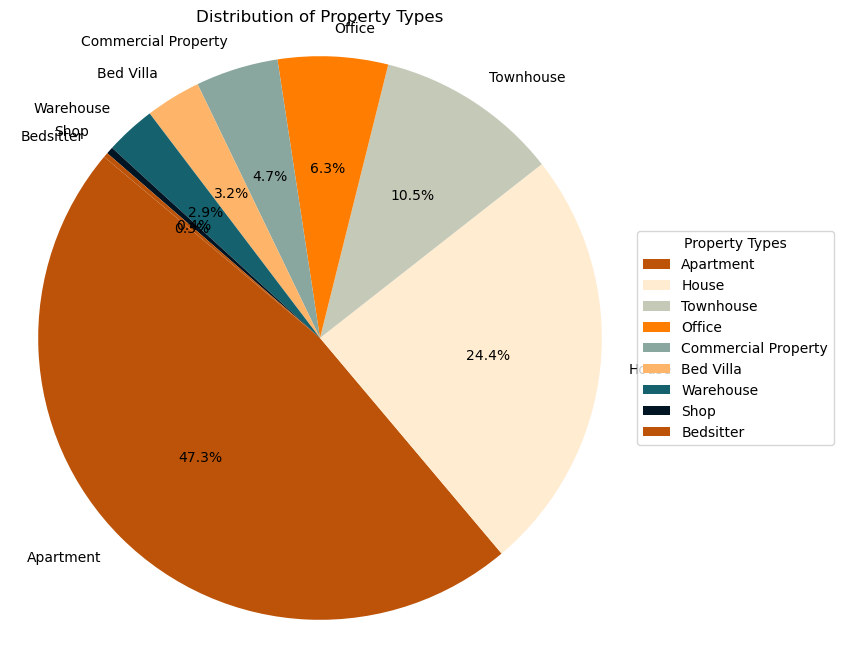

In [10]:
colors = ['#BC5308', '#FFECD1', '#C5CAB8','#FF7D00', '#8AA79F', '#FFB569', '#15616D', '#001524']

Property_type_counts = df['Property_Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Property_type_counts, labels=Property_type_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Property Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(Property_type_counts.index, title="Property Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the pie chart
plt.show()


In [11]:
import plotly.express as px

# Your color codes
colors = ['#15616D','#BC5308', '#FFECD1', '#C5CAB8', '#FF7D00', '#8AA79F', '#FFB569',  '#001524']

Property_type_counts = df['Property_Type'].value_counts().reset_index()
Property_type_counts.columns = ['Property_Type', 'Count']

fig = px.pie(Property_type_counts, values='Count', names='Property_Type',
             title='Distribution of Property Types', hole=0.4, color_discrete_sequence=colors)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()


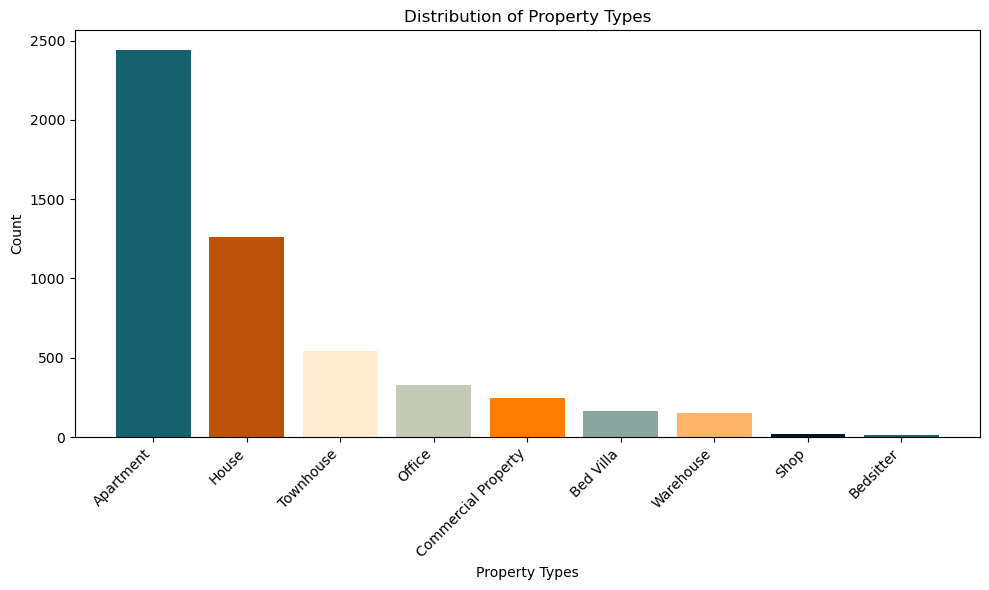

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(Property_type_counts['Property_Type'], Property_type_counts['Count'], color=colors)
plt.xlabel('Property Types')
plt.ylabel('Count')
plt.title('Distribution of Property Types')
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.tight_layout()
plt.show()


In [13]:
summary_stats = df['Price_Clean'].describe()

summary_table = pd.DataFrame({'Statistic': summary_stats.index, 'Value': summary_stats.values})

pd.options.display.float_format = '{:.2f}'.format

# Setting the float format to display numbers in the usual format (not scientific notation)
pd.options.display.float_format = '{:,.2f}'.format  # Add comma as a thousands separator

# Converting the "Value" column to integers and then format it
summary_table['Value'] = summary_table['Value'].astype(int).apply(lambda x: format(x, ','))


print(summary_table)

  Statistic        Value
0     count        5,168
1      mean      354,361
2       std    7,260,094
3       min            1
4       25%      100,000
5       50%      182,195
6       75%      300,000
7       max  500,000,000




<style>
  /* Define custom styles for text and subheadings */
  .text-color {
    color: #FFECD1; /* Cream color for text */
  }

  .subheading-color {
    color: #BC5308; /* Amber color for subheadings */
  }

  .heading-color {
    color: #FF7D00; /* Orange color for headings */
  }
</style>

# <font color = "FF7DOO"> Data visualization</font>
## <span class="heading-color">Objectives of Data Visualization</span>

<span class="subheading-color">1. Enhance Data Understanding</span>
- <span class="text-color">Visualizations help users grasp complex data patterns and relationships more easily than raw data.</span>

<span class="subheading-color">2. Communicate Insights</span>
- <span class="text-color">Effective visualizations convey key findings and insights to a wider audience, making data more accessible.</span>

<span class="subheading-color">3. Identify Trends and Patterns</span>
- <span class="text-color">Visual exploration of data can reveal trends, outliers, and patterns that may not be apparent in tabular data.</span>

<span class="subheading-color">4. Support Decision-Making</span>
- <span class="text-color">Well-designed visualizations provide decision


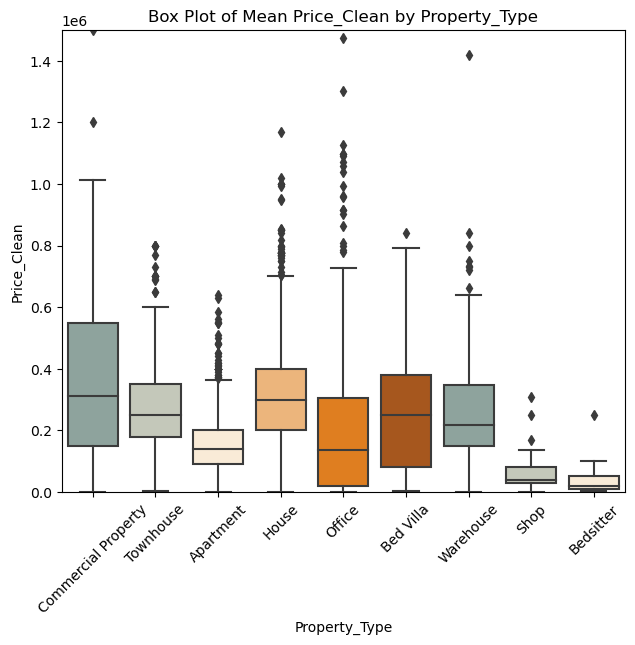

In [14]:
colors = ['#001524', '#15616D', '#8AA79F', '#C5CAB8', '#FFECD1', '#FFB569', '#FF7D00', '#BC5308']
plt.figure(figsize=(16, 6))

plt.subplot(121)
ax = sns.boxplot(data=df, x='Property_Type', y='Price_Clean', palette=colors[2:])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Box Plot of Mean Price_Clean by Property_Type')

plt.ylim(0, 1500000) 


plt.show()

In [15]:
outlier_property_types = ['Townhouse', 'Apartment', 'House', 'Office', 'Bed Villa', 'Warehouse', 'Shop', 'Bedsitter']


def remove_outliers_by_property_type(df, property_type):
    mask = (df['Property_Type'] == property_type)
    data = df.loc[mask, 'Price_Clean']
    
    z_scores = np.abs((data - data.mean()) / data.std())
    threshold = 1.5 # Adjust the threshold as needed
    
    df.loc[mask, 'Price_Clean'] = data[z_scores <= threshold]
    
# Loop through the specified property types and remove outliers
for property_type in outlier_property_types:
    remove_outliers_by_property_type(df, property_type)

# Reset the index
df.reset_index(drop=True, inplace=True)



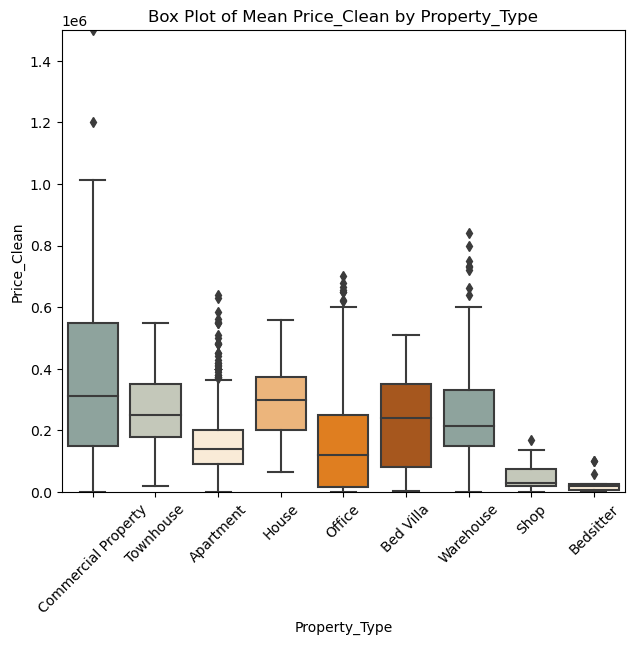

In [16]:
#repeat the boxplot issue

colors = ['#001524', '#15616D', '#8AA79F', '#C5CAB8', '#FFECD1', '#FFB569', '#FF7D00', '#BC5308']
plt.figure(figsize=(16, 6))

plt.subplot(121)
ax = sns.boxplot(data=df, x='Property_Type', y='Price_Clean', palette=colors[2:])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Box Plot of Mean Price_Clean by Property_Type')

plt.ylim(0, 1500000) 


plt.show()

In [17]:
 df['Property_Type']
 df.columns.unique()

Index(['Property', 'Location', 'Price', 'Property_New', 'Property_Type',
       'Size', 'Price_Clean'],
      dtype='object')

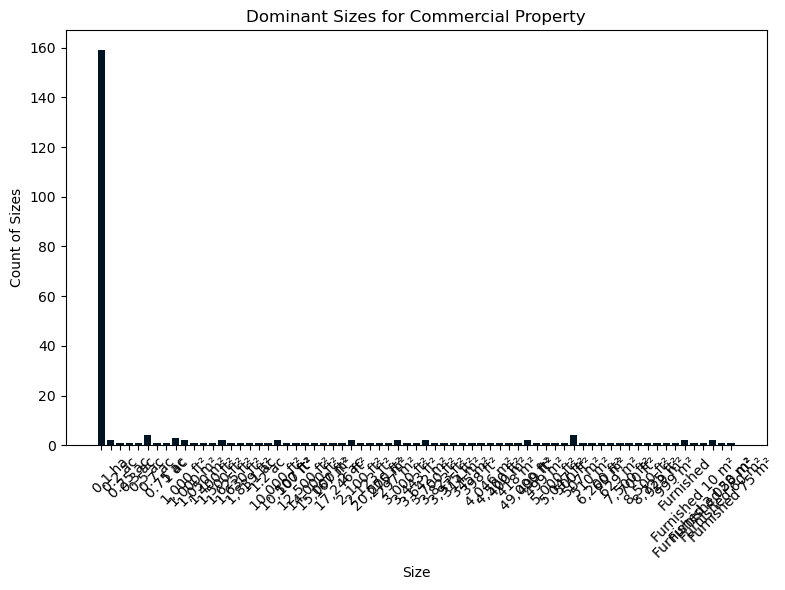

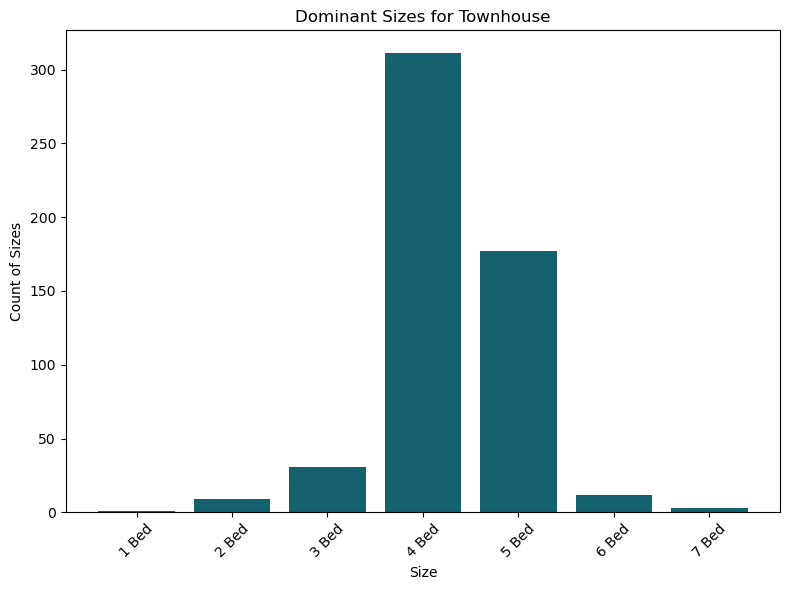

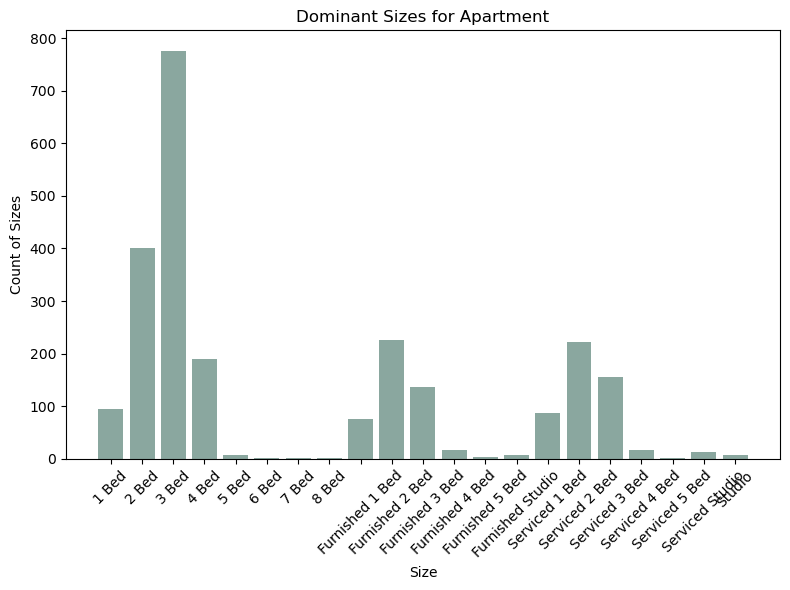

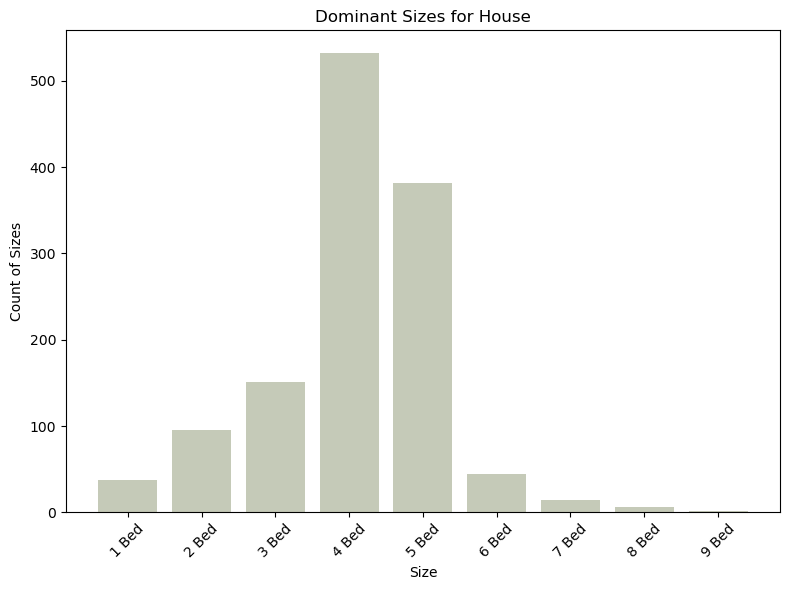

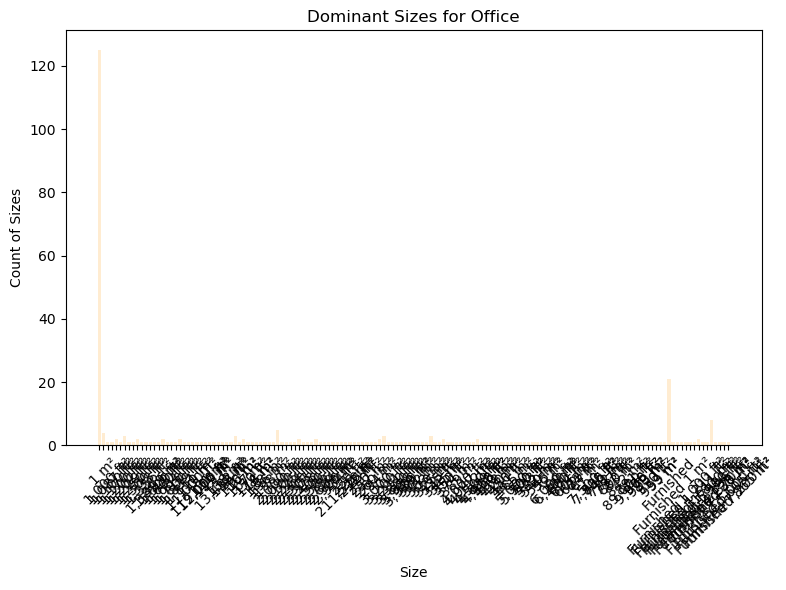

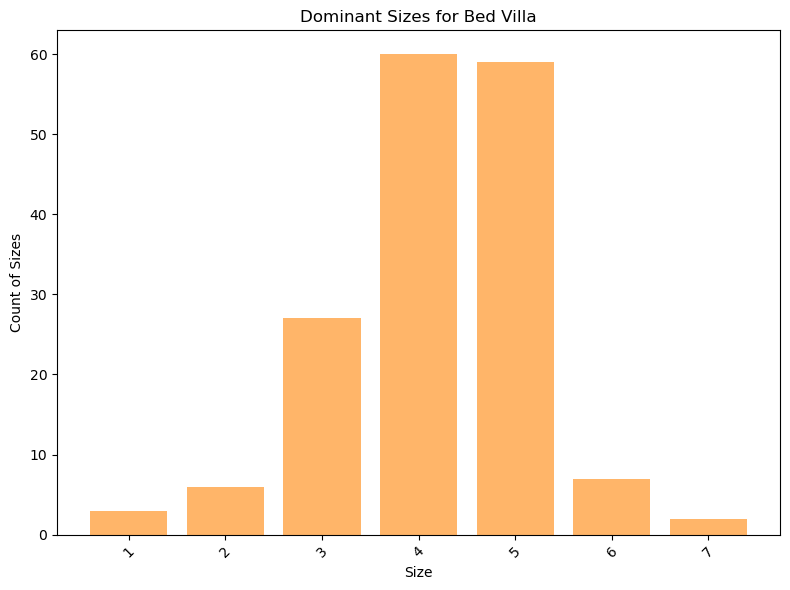

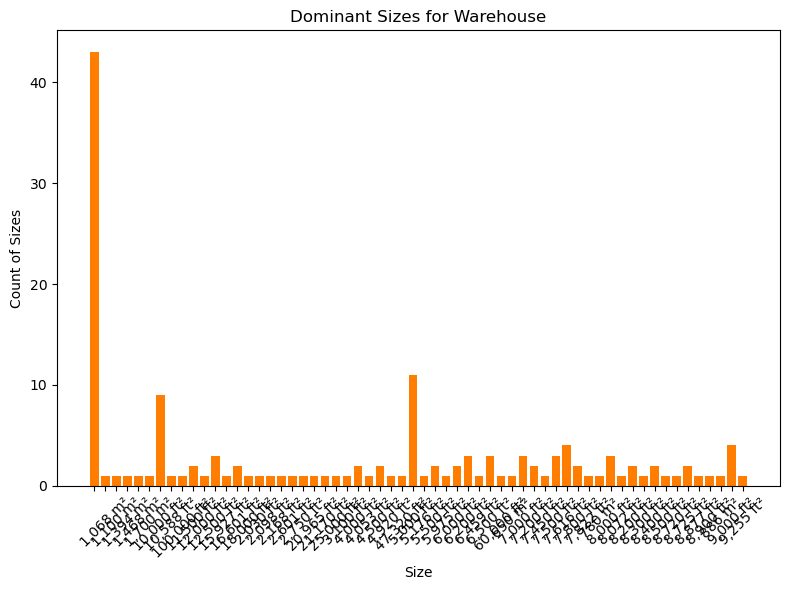

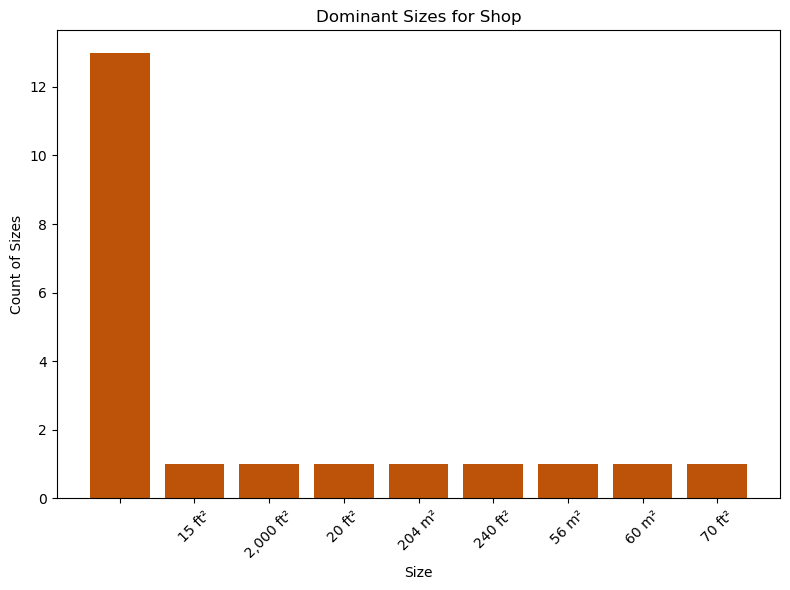

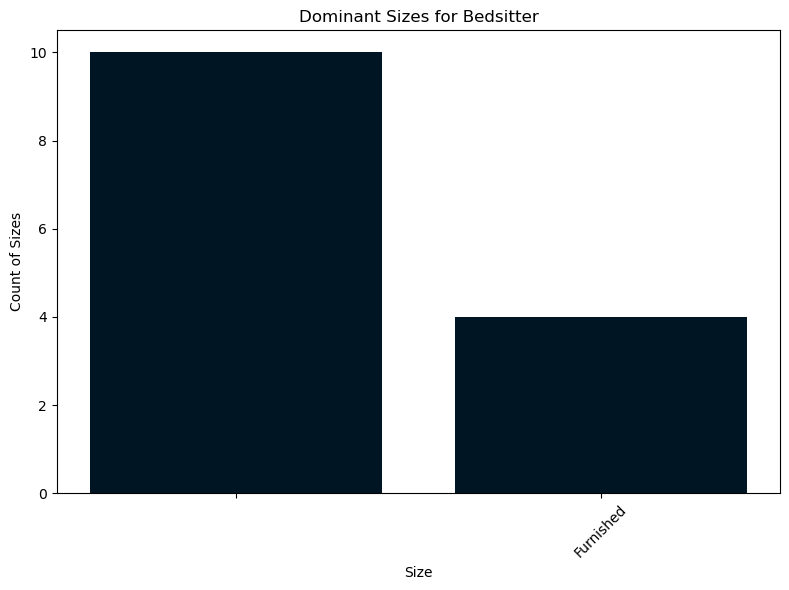

In [18]:
color_themes = ['#001524', '#15616D', '#8AA79F', '#C5CAB8', '#FFECD1', '#FFB569', '#FF7D00', '#BC5308']
property_types = ['Commercial Property', 'Townhouse','Apartment', 'House', 'Office', 'Bed Villa', 'Warehouse', 'Shop', 'Bedsitter']
# Iterate through property types and create separate plots with chosen color themes
# Enable inline Matplotlib plotting
%matplotlib inline
for i, property_type in enumerate(property_types):
    sizes = df[df['Property_Type'] == property_type]['Size'].value_counts().sort_index()
    plt.figure(figsize=(8, 6))
    plt.bar(sizes.index, sizes.values, color=color_themes[i % len(color_themes)])  # Use the chosen color themes cyclically
    plt.title(f'Dominant Sizes for {property_type}')
    plt.xlabel('Size')
    plt.ylabel('Count of Sizes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


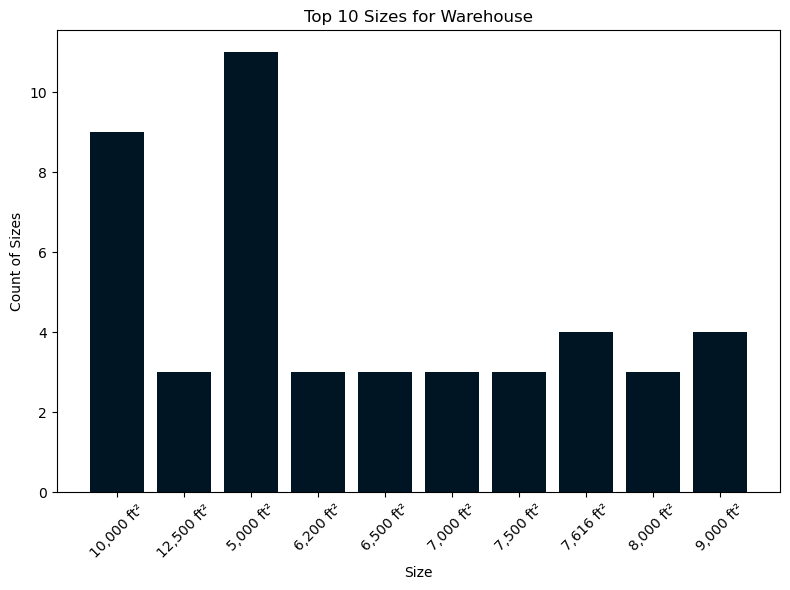

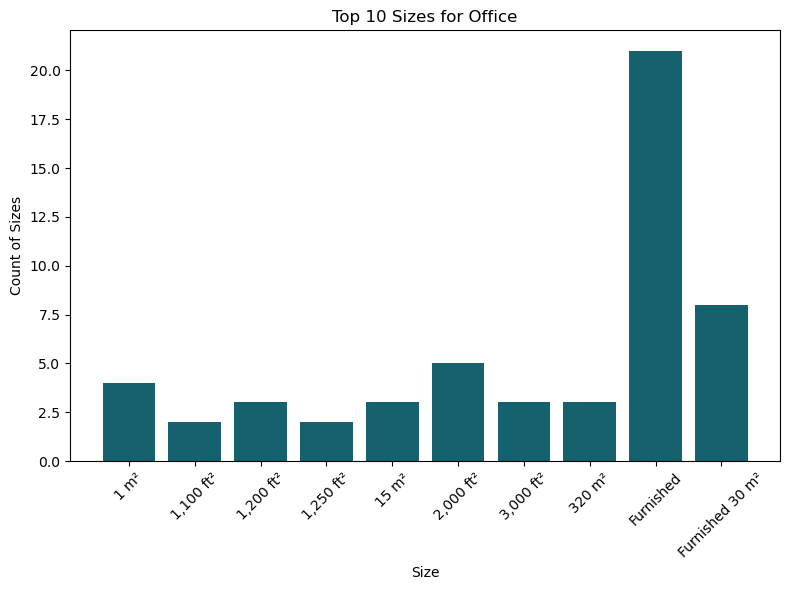

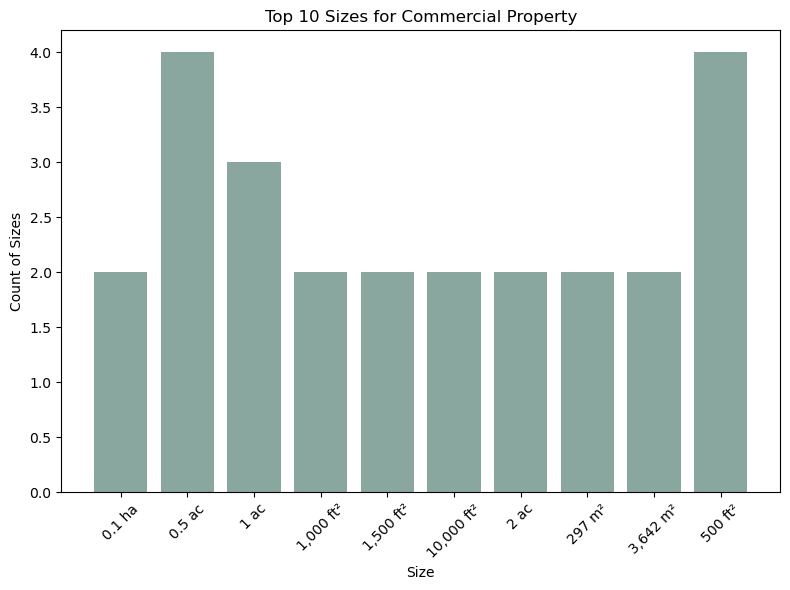

In [19]:
# Define Property Types of interest
property_types_of_interest = ['Warehouse', 'Office', 'Commercial Property']

# Define your chosen color themes
color_themes = ['#001524', '#15616D', '#8AA79F', '#C5CAB8', '#FFECD1', '#FFB569', '#FF7D00', '#BC5308']

# Iterate through property types of interest and create separate plots with chosen color themes
for property_type in property_types_of_interest:
    sizes = df[(df['Property_Type'] == property_type) & (df['Size'] != '')]['Size'].value_counts().sort_index()
    # Select the top 10 sizes in ascending order
    top_10_sizes = sizes.nlargest(10).sort_index()
    if not top_10_sizes.empty:
        plt.figure(figsize=(8, 6))
        plt.bar(top_10_sizes.index, top_10_sizes.values, color=color_themes[property_types_of_interest.index(property_type) % len(color_themes)])  # Use the chosen color themes cyclically
        plt.title(f'Top 10 Sizes for {property_type}')
        plt.xlabel('Size')
        plt.ylabel('Count of Sizes')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

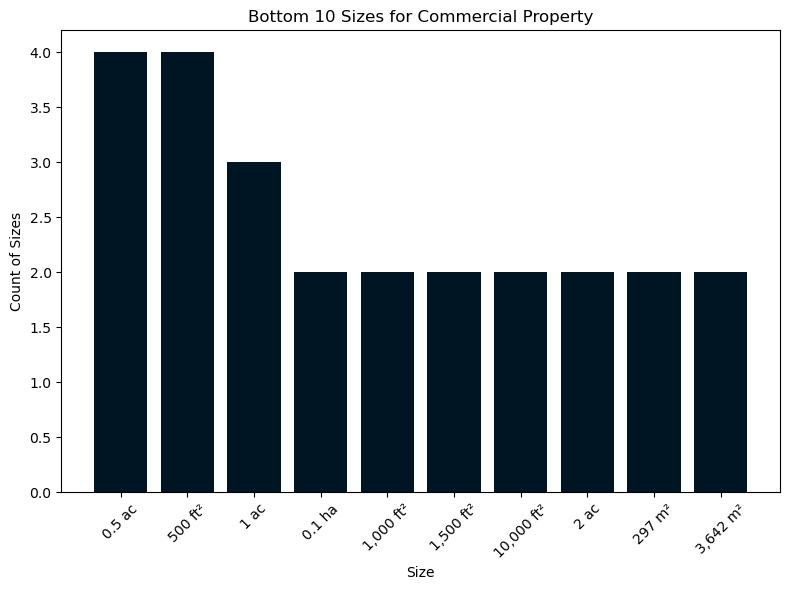

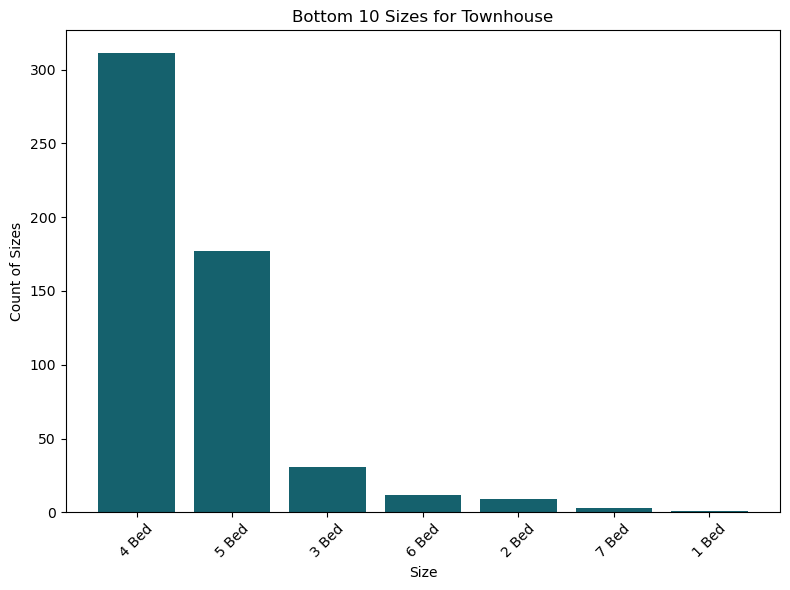

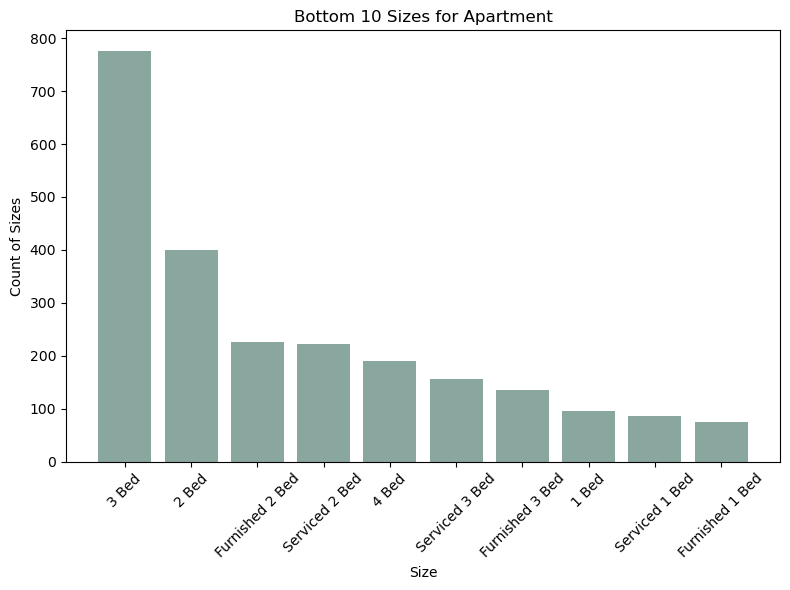

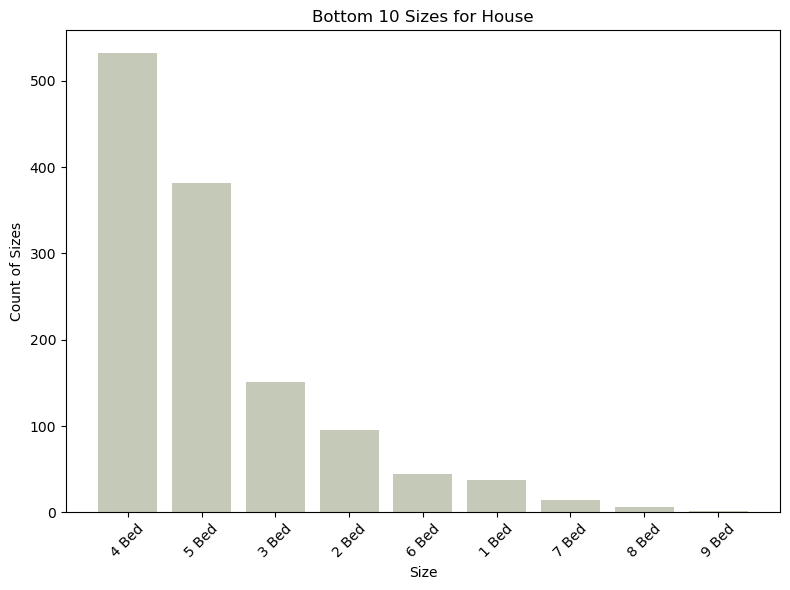

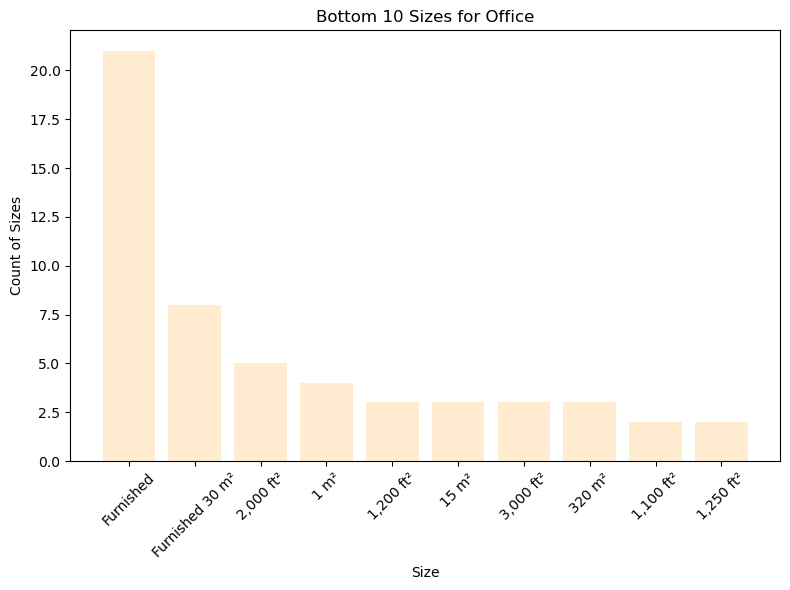

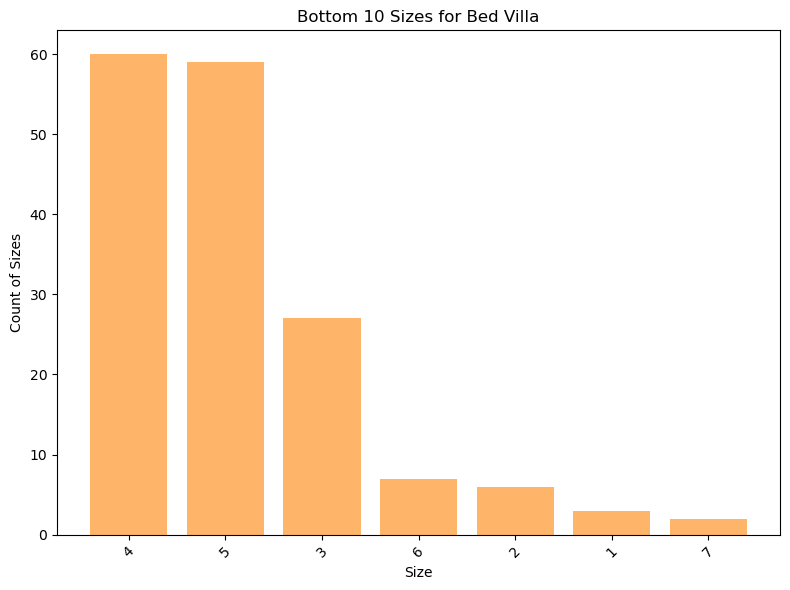

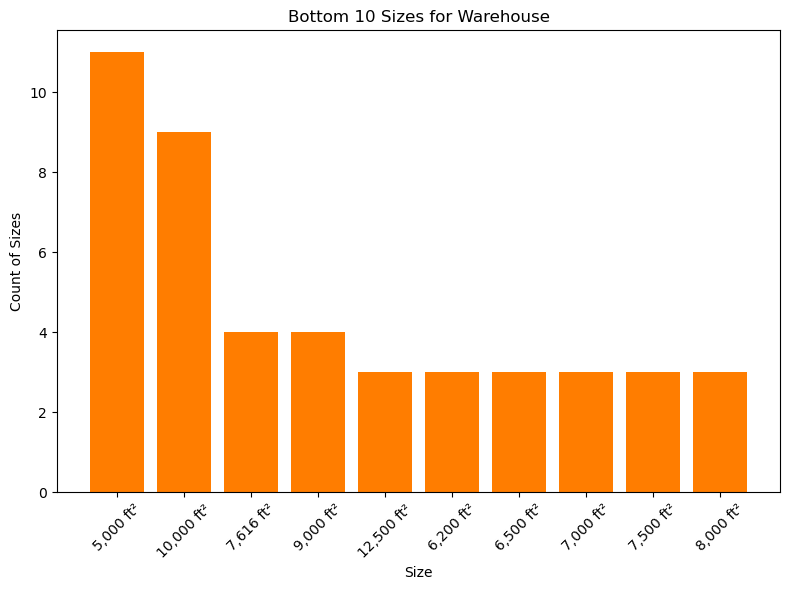

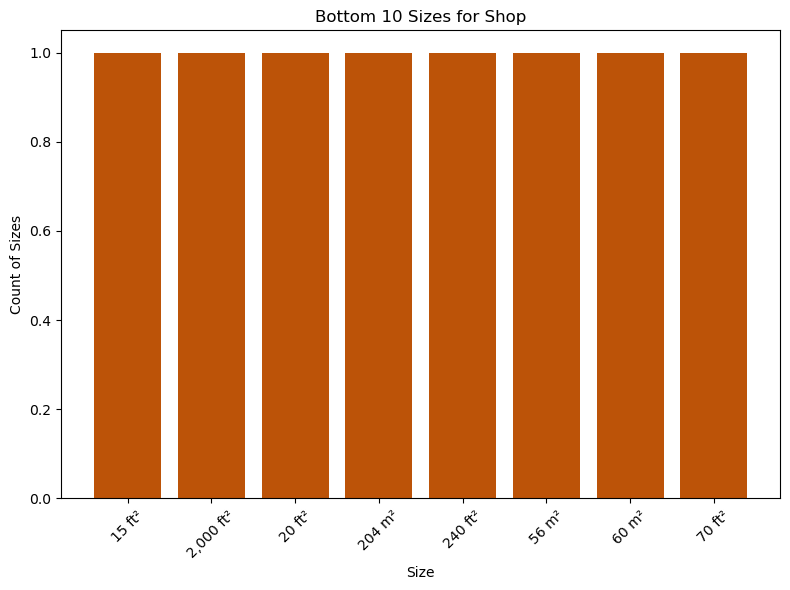

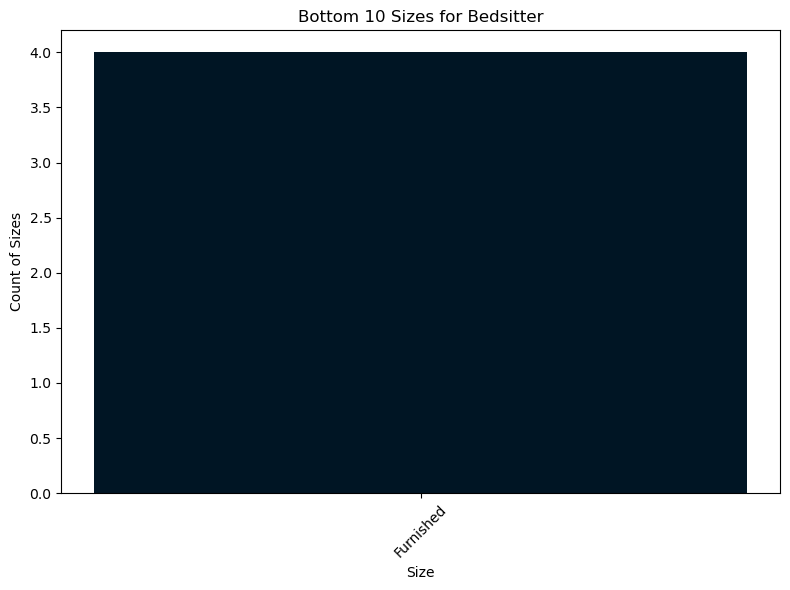

In [20]:
# Get all unique property types
all_property_types = df['Property_Type'].unique()

# Iterating through property types and create separate plots for the bottom 10 sizes in descending order
for property_type in all_property_types:
    sizes = df[(df['Property_Type'] == property_type) & (df['Size'] != '')]['Size'].value_counts().sort_index()
    # Select the bottom 10 sizes in descending order
    bottom_10_sizes = sizes.nlargest(10).sort_values(ascending=False)
    if not bottom_10_sizes.empty:
        plt.figure(figsize=(8, 6))
        plt.bar(bottom_10_sizes.index, bottom_10_sizes.values, color=color_themes[all_property_types.tolist().index(property_type) % len(color_themes)])  # Use the chosen color themes cyclically
        plt.title(f'Bottom 10 Sizes for {property_type}')
        plt.xlabel('Size')
        plt.ylabel('Count of Sizes')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [21]:
# Check data types of all columns
column_data_types = df.dtypes

# Select columns for data transformation
selected_columns = ['Location','Property_New', 'Property_Type', 'Size', 'Price_Clean']

# Separating numerical and categorical columns
numerical_columns = [col for col in selected_columns if pd.api.types.is_numeric_dtype(df[col])]
categorical_columns = [col for col in selected_columns if not pd.api.types.is_numeric_dtype(df[col])]

# Print the results
print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['Price_Clean']

Categorical Columns:
['Location', 'Property_New', 'Property_Type', 'Size']


<style>
  /* Define custom styles for text and subheadings */
  .text-color {
    color: #FFECD1; /* Cream color for text */
  }

  .subheading-color {
    color: #BC5308; /* Amber color for subheadings */
  }

  .heading-color {
    color: #FF7D00; /* Orange color for headings */
  }
</style>

#  <font color = "FF7DOO"> Modelling - Regression analysis</font>
<span class="heading-color">Objectives for Building a Regression Model</span>

<span class="subheading-color">1. Predict Rental Prices Accurately</span>
- <span class="text-color">Develop a regression model that accurately predicts rental prices in the area, minimizing prediction errors.</span>

<span class="subheading-color">2. Identify Significant Predictors</span>
- <span class="text-color">Determine the most influential factors (e.g., location, square footage) that impact rental prices in the area.</span>

<span class="subheading-color">3. Model Interpretability</span>
- <span class="text-color">Ensure the regression model is interpretable, allowing stakeholders to understand how input variables affect rent.</span>

<span class="subheading-color">4. Evaluate Model Performance</span>
- <span class="text-color">Assess the model's performance using appropriate metrics (e.g., RMSE, R-squared) and validate its reliability.</span>

<span class="subheading-color">5. Provide Actionable Insights</span>
- <span class="text-color">Deliver actionable insights and recommendations based on the regression model's results to support decision-making in the real estate market.</span>


In [22]:

import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

print(df.shape)
df = df[(df['Price_Clean']>20000) & (df['Price_Clean']<500000)]
print(df.shape)

# Assuming you have a DataFrame 'df' with columns 'Property' and 'Price_Clean'
# Preprocessing text data (using TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['Property'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Price_Clean'], test_size=0.2, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)


(5168, 7)
(4530, 7)


In [24]:
 #!pip install lightgbm

In [25]:

# Define LightGBM parameters (you can customize these)
params = {
    'objective': 'regression',
    'metric': 'mae',  # You can also use 'rmse' here
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
gbm = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print MAE and RMSE
print("MAE:", mae)
print("RMSE:", rmse)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2482
[LightGBM] [Info] Number of data points in the train set: 3624, number of used features: 73
[LightGBM] [Info] Start training from score 204476.035596
MAE: 62203.467500381565
RMSE: 80361.60118912271


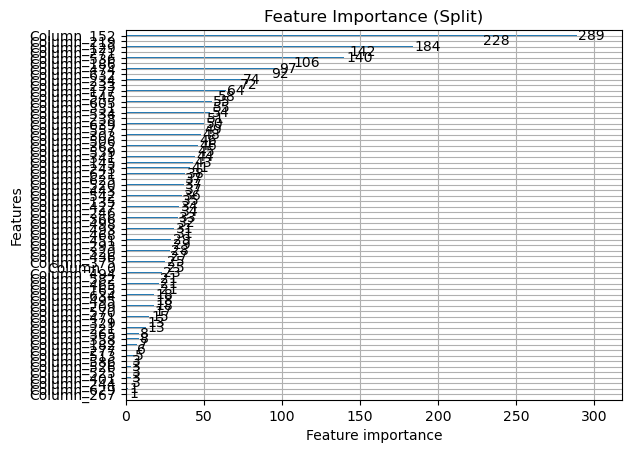

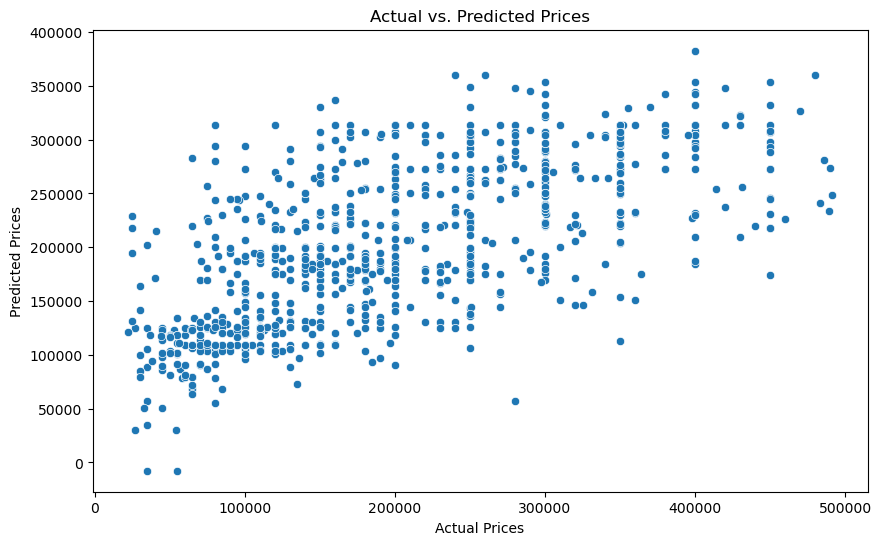

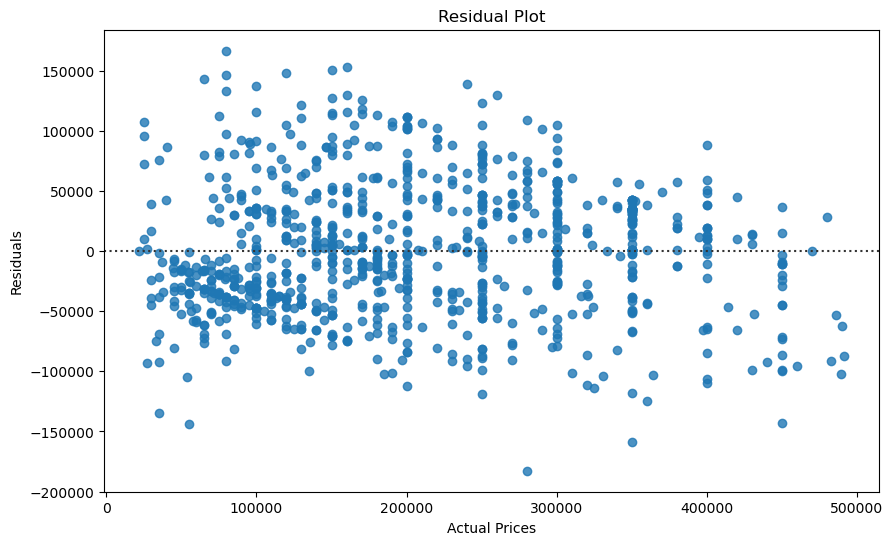

In [26]:
lgb.plot_importance(gbm, importance_type='split', title='Feature Importance (Split)')
plt.show()

# Actual vs. Predicted Prices Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [27]:
# Save the trained LightGBM model to a file
gbm.save_model('lightgbm_model.txt')

# <font color = "FF7DOO"> Deployment</font>

In [30]:
#!pip install lightgbm
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import ipywidgets as widgets
from IPython.display import display
!jupyter nbextension enable --py widgetsnbextension
# Load the saved LightGBM model
gbm = lgb.Booster(model_file='lightgbm_model.txt')

# Create a TF-IDF vectorizer for text preprocessing
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_vectorizer.fit_transform(df['Property'])
# Create a text input widget
text_input = widgets.Textarea(
    value='Enter property description here...',
    placeholder='Type or paste property description here',
    layout=widgets.Layout(width='80%', height='100px')
)

# Create a button widget
predict_button = widgets.Button(
    description='Predict Price',
    layout=widgets.Layout(width='20%')
)

# Create an output widget for displaying predictions
output = widgets.Output()

# Define a function to handle prediction
def predict_price(b):
    input_text = text_input.value
    # Preprocess the input text using TF-IDF
    input_vector = tfidf_vectorizer.transform([input_text])
    # Make a prediction using the saved model
    prediction = gbm.predict(input_vector, num_iteration=gbm.best_iteration)
    with output:
        output.clear_output()
        print(f"Predicted Price: KES: {prediction[0]:.2f}")

# Set the button's click event handler
predict_button.on_click(predict_price)

# Display widgets
display(text_input)
display(predict_button)
display(output)




Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


Textarea(value='Enter property description here...', layout=Layout(height='100px', width='80%'), placeholder='…

Button(description='Predict Price', layout=Layout(width='20%'), style=ButtonStyle())

Output()